# Práctico 2

In [332]:
import pandas as pd
import matplotlib.pyplot as plt

In [333]:
#Read the data from the CSV file
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Columnas:
+ **Identificatorios**: `show_id`
+ **Caracteristicas**: `type`,`title`, `duration`,`description`
+ **Fechas**: `date_added`, `release_year`
+ **Otros**: `director`, `cast`, `country`, `rating`, `listed_in`

In [334]:
#Colours 
colours = ['#f5f5f1', '#df0707', '#ba0c0c', '#980a0a', '#780909', '#0b0000']

+ ### **Primera parte: Tipo de show más frecuente**

In [335]:
#Dictionary of the genres
replace_dict = {
    'International TV Shows': 'International Shows',
    'Korean TV Shows': 'Korean Shows',
    'Romantic TV Shows' : 'Romcoms',
    'British TV Shows': 'British Shows' ,
    'Crime TV Shows': 'Crime Shows',
    
}       

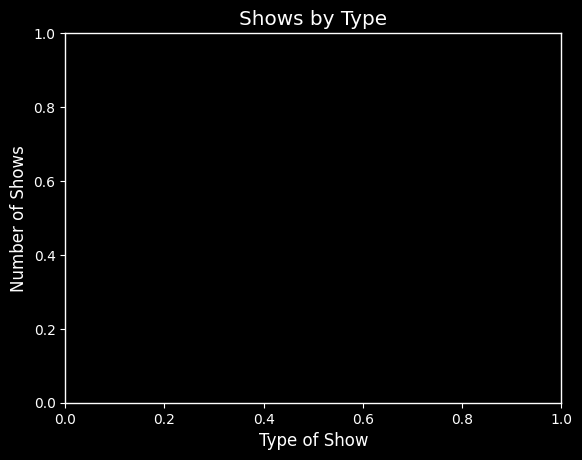

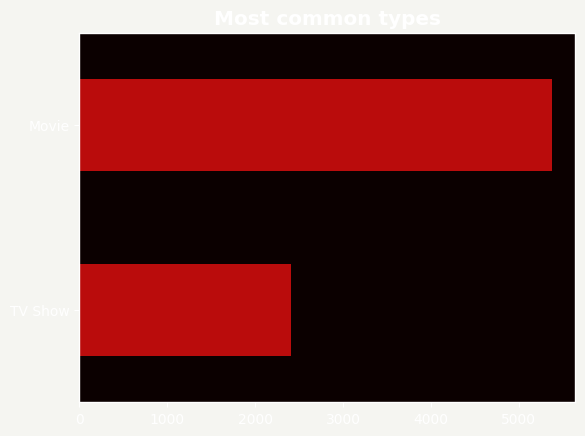

In [336]:
#Plot the shows by type in a horizontal bar chart
type_count = df['type'].value_counts()
plt.title('Shows by Type')
plt.ylabel('Number of Shows')
plt.xlabel('Type of Show')

fig, ax = plt.subplots()

#Create the chart
fig.patch.set_facecolor(color=colours[0])
bar_colours = [colours[2]] * 10

type_count_sort = type_count.sort_values(ascending=True)
type_count_sort.plot(kind='barh', color=bar_colours, ax=ax)

ax.set_title('Most common types', fontweight = 'bold')
ax.set_ylabel('')

ax.set_facecolor(colours[5])


plt.show()


In [337]:
# Get the percentage of movies and TV shows
type_count = df['type'].value_counts(normalize=True) * 100
# Print the percentage of movies and TV shows
type_count = type_count.round(2)
print(type_count)

# Print the total amount of movies and TV shows
total = df['type'].count()
print(total)



type
Movie      69.05
TV Show    30.95
Name: proportion, dtype: float64
7787


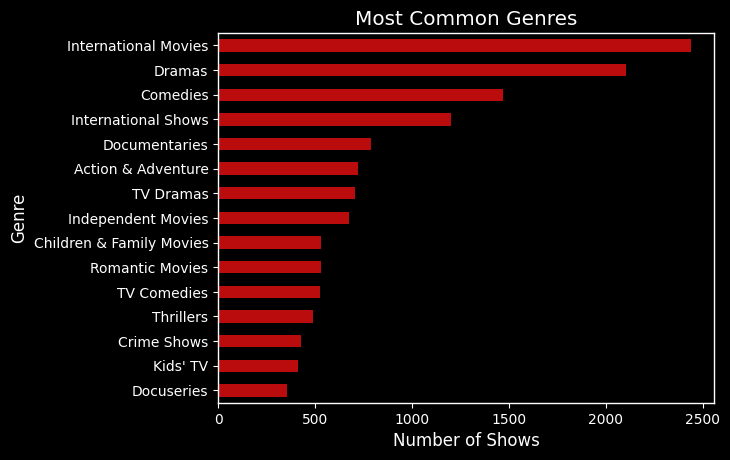

In [338]:


#Cast 'listed_in' to string
df['listed_in'] = df['listed_in'].astype(str)

#Dropping the null values and separating them
df_str = df.dropna(subset=['listed_in'])
div_genres = df_str['listed_in'].str.split(', ').explode()

div_genres = div_genres.replace(replace_dict)
genre_count = div_genres.value_counts().head(15)

# Set the background colour of the plot to black
plt.style.use('dark_background')
# Set the text colour of the plot to white
plt.rcParams['text.color'] = 'white'

# Plot the most common genres in a horizontal bar chart
genre_count = genre_count.sort_values(ascending=True)
genre_count.plot(kind='barh', color=colours[2])
plt.title('Most Common Genres')
plt.xlabel('Number of Shows')
plt.ylabel('Genre')

plt.show()



# #Creating the chart
# fig.patch.set_facecolor(color=colours[0])
# bar_colours = [colours[2]] * 10

# genre_count_sort = genre_count.sort_values(ascending=True)
# genre_count_sort.plot(kind='barh', color=bar_colours, ax=ax)

# ax.set_title('Five most common genres', fontweight = 'bold')
# ax.set_ylabel('')

# ax.set_facecolor(colours[0])

# plt.show()

+ ### **Segunda pregunta: Año con más pelis y series producidas**

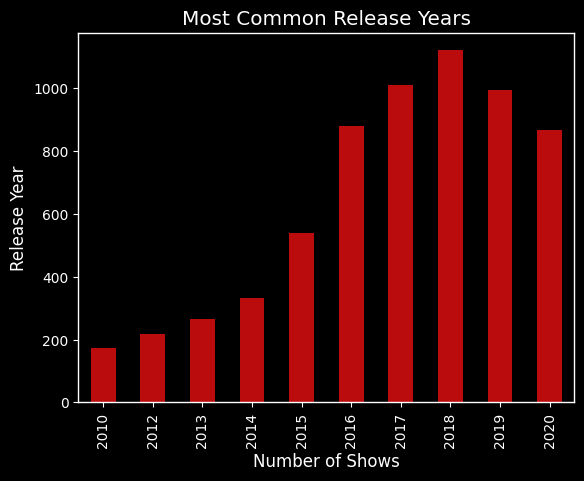

In [339]:
#Count release_year and plot the ten most common years
df['release_year'] = df['release_year'].astype(int)

release_year_count = df['release_year'].value_counts().head(10)
# Sort the years in ascending cronomological order
release_year_count = release_year_count.sort_index(ascending=True)

# Plot the release years in a bar chart
release_year_count.plot(kind='bar', color=colours[2])
plt.title('Most Common Release Years')
plt.xlabel('Number of Shows')
plt.ylabel('Release Year')

plt.show()


# #Plotting it in a bar chart
# fig, ax = plt.subplots()
# fig.patch.set_facecolor(color=colours[0])
# release_year_count.plot(kind='barh', color=colours[2], ax=ax)
# ax.set_title('Ten most common release years', fontweight = 'bold')
# ax.set_xlabel('Number of movies and TV Shows')
# ax.set_ylabel('')
# ax.set_facecolor(colours[0])

plt.show()

+ ### **Tercera pregunta: Países con más pelis y series producidas**

In [340]:
from mpl_toolkits.basemap import Basemap

#Creating a dictionary of the countries

country_to_coords = {
    #Pais: (latitud, longitud)
    'United States': (37.0902, -95.7129),
    'United Kingdom': (55.3781, -3.4360),
    'South Korea': (37.5326, 127.0246),
    'India': (20.5937, 78.9629),
    'Canada':  (56.1304, -106.3468),
    'Japan': (36.2048, 138.2529),
    'Turkey': (39.1667, 35.6667),
    'Spain': (40.4637, -3.7492),
    'France': (46.6034, 1.8883),
    'Egypt': (26.4337, 29.8240),
    'Turkey' : (38.9637, 35.2433),
    'Mexico': (23.6345, -102.5528),
    'Australia': (-25.2744, 133.7751),
    'Brazil': (-14.2350, -51.9253),
    'Nigeria': (9.0820, 8.6753),
    'Germany': (51.1657, 10.4515),
    'Italy': (41.8719, 12.5674),
    'Argentina': (-38.4161, -63.6167),
    'Philippines': (12.8797, 121.7740),
    'Indonesia': (-0.7893, 113.9213),
    'Taiwan': (23.6978, 120.9605),
    'Hong Kong': (22.3193, 114.1694),
    'Thailand': (15.8700, 100.9925),
    'South Africa': (-30.5595, 22.9375),
    'Russia': (55.7558, 37.6176),
    'Sweden': (60.1282, 18.6435),
    'Norway': (60.4720, 8.4689),
    'Denmark': (56.2639, 9.5018),
    'Netherlands': (52.1326, 5.2913),
    'Belgium': (50.5039, 4.4699),
    'Ireland': (53.1424, -7.6921),
    'New Zealand': (-40.9006, 174.8860),
    'Poland': (51.9194, 19.1451),
}

30


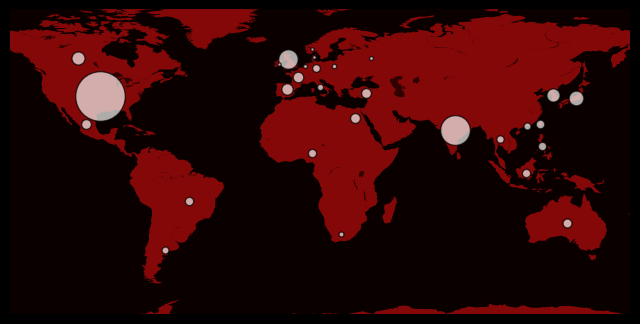

In [341]:
#Converting to string and discarding nan values
df['country'] = df['country'].astype(str)
df = df[df['country'].str.lower() != 'nan']

#Discarding null country values and counting top 52 countries
df_countries = df['country'].dropna()
country_count = df['country'].value_counts().head(52)

#Creating the map
plt.figure(figsize=(8, 10))
wmap = Basemap(llcrnrlon=-140, llcrnrlat=-70,urcrnrlon=165,urcrnrlat=80)

# Draw boundaries, continents and coastlins
wmap.drawmapboundary(fill_color=colours[5], linewidth=0)
wmap.fillcontinents(color=colours[2], alpha=0.7, lake_color=colours[5])
wmap.drawcoastlines(linewidth=0, color="white")

#print(country_count)
i = 0
#Plotting scatter bubbles of the countries
for country, country_counts in country_count.items():
    coords = country_to_coords.get(country)
    
    if coords:
        x, y = wmap(coords[1], coords[0])  
        i += 1
        # Add a legend with the country name and the number of movies to the biggest countries
        wmap.scatter(x, y, s=country_counts/2, c=colours[0], alpha=0.7, edgecolor='k', linewidth=1)
print(i)

# show
plt.show()

In [342]:
# Counting the countries and plotting the ten most common
country_count = df['country'].value_counts().head(15)
country_count = country_count.sort_values(ascending=True)
print(country_count)

# country_count_sorted = country_count.sort_values(ascending=True)

# #Plotting the graph of the most common countries in a horizontal bar chart
# fig, ax = plt.subplots()
# fig.patch.set_facecolor(color=colours[0])
# bar_colours = [colours[2]] * 10
# country_count_sorted.plot(kind='barh', color=bar_colours, ax=ax)
# ax.set_title('Ten most common countries', fontweight = 'bold')
# ax.set_xlabel('N° of movies & shows')
# ax.set_ylabel('Countries')
# plt.show()

country
Philippines         71
Brazil              72
Taiwan              78
Australia           83
Turkey             100
Mexico             100
Egypt              101
France             115
Spain              134
Canada             177
South Korea        183
Japan              226
United Kingdom     397
India              923
United States     2555
Name: count, dtype: int64


+ ### **Pregunta 4: Series y películas según rating**

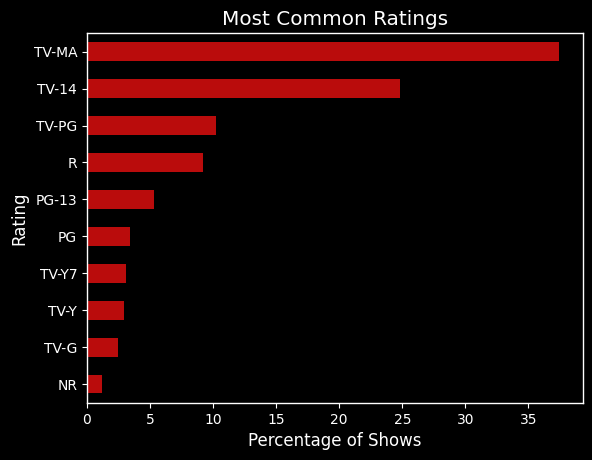

In [343]:
#Count the ratings and plot the ten most common
rating_count = df['rating'].value_counts().head(10)

# Normalize the ratings
rating_count = rating_count / rating_count.sum() * 100

rating_count_sorted = rating_count.sort_values(ascending=True)
# Plot the most common ratings in a horizontal bar chart, add the percentage of each rating
rating_count_sorted.plot(kind='barh', color=colours[2])
plt.title('Most Common Ratings')
plt.xlabel('Percentage of Shows')
plt.ylabel('Rating')

plt.show()




# #Plotting the graph of the most common ratings in a horizontal bar chart
# fig, ax = plt.subplots()
# fig.patch.set_facecolor(color=colours[0])
# bar_colours = [colours[2]] * 15
# rating_count_sorted.plot(kind='barh', color=bar_colours, ax=ax)

# ax.set_title('Ten most common ratings', fontweight = 'bold', color=colours[5])
# ax.set_facecolor(colours[5])

# ax.set_xlabel('N° of movies & shows', color=colours[5])
# ax.set_ylabel('Ratings', color = colours[5])

# ax.tick_params(axis='x', colors=colours[0])
# ax.tick_params(axis='y', colors=colours[0])

# for label in ax.get_xticklabels():
#     label.set_color(colours[5])
# for label in ax.get_yticklabels():
#     label.set_color(colours[5])

# plt.show()


+ ### **Pregunta 5: Audiencia objetivo segun el origen de los shows**

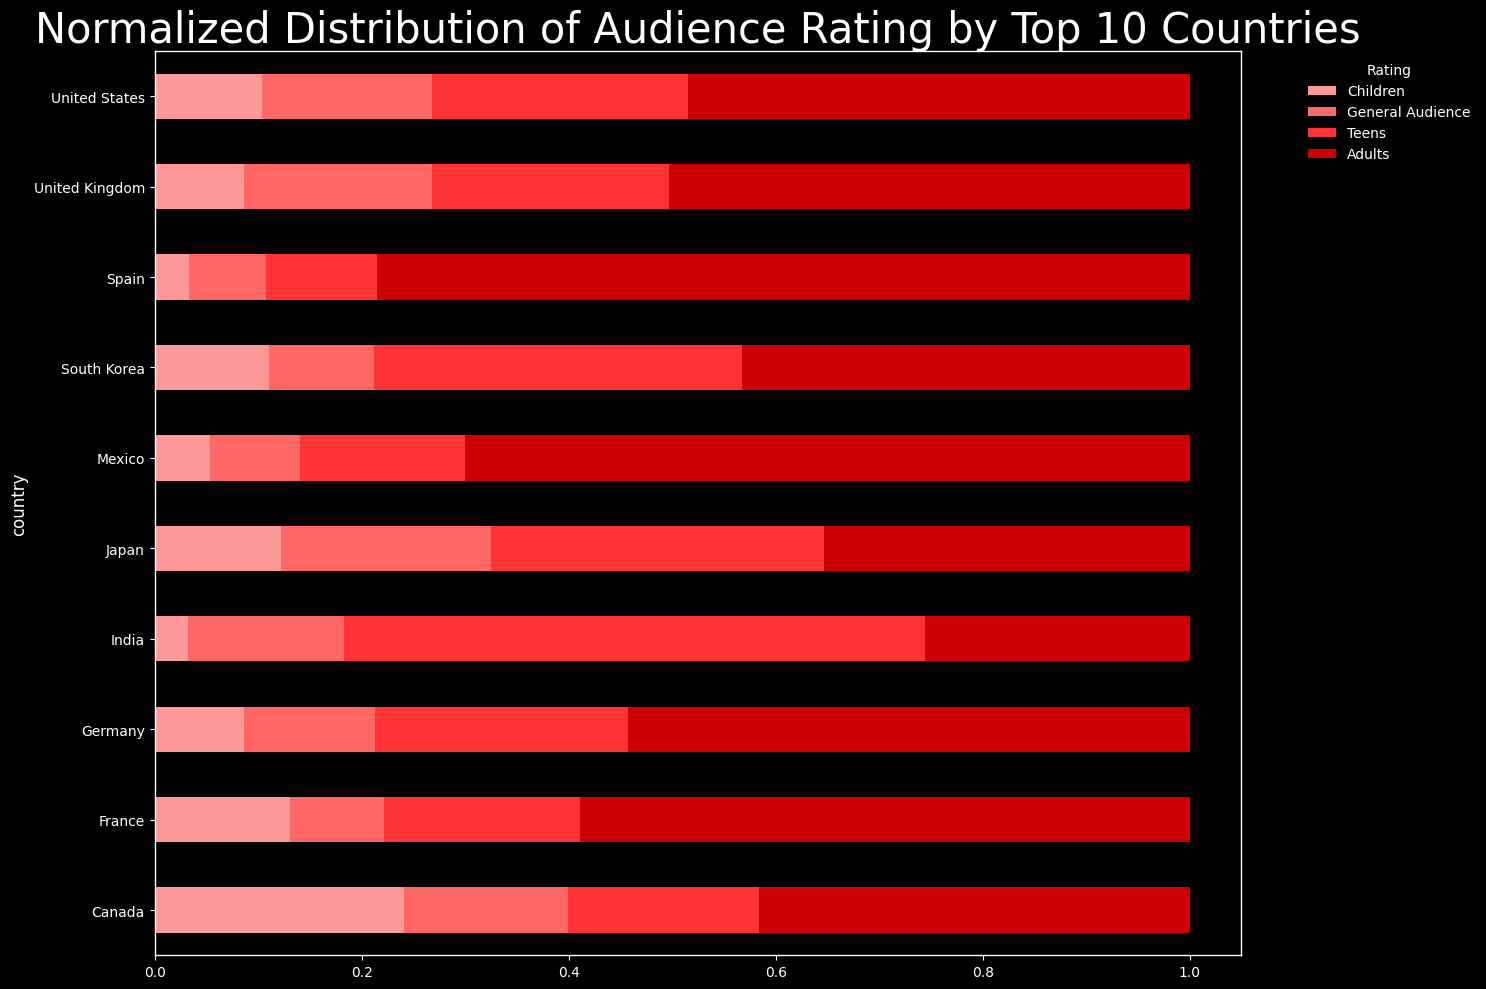

In [344]:
# Adjusting the categorization logic to split Teens and General Audience
df['rating'] = df['rating'].apply(lambda x: 'Unrated' if x in ['UR', 'NR'] 
                                  else 'Adults' if x in ['TV-MA', 'R', 'NC-17'] 
                                  else 'Teens' if x in ['TV-14', 'PG-13'] 
                                  else 'General Audience' if x in ['TV-PG', 'PG', 'G'] 
                                  else 'Children' if x in ['TV-Y7', 'TV-Y7-FV', 'TV-Y', 'TV-G'] 
                                  else 'Unrated')

# Handling country column, splitting and normalizing
df['country'] = df['country'].fillna('Unknown').astype(str).str.split(', ')
df_exploded = df.explode('country')
df_exploded['country'] = df_exploded['country'].str.strip().str.rstrip(',')

# Grouping by country and rating, normalizing by total films per country
df_grouped = df_exploded.groupby(['country', 'rating']).size().reset_index(name='count')

# Sorting countries by total count and taking the top 10
top_countries = df_grouped.groupby('country')['count'].sum().nlargest(10).index
df_top_countries = df_grouped[df_grouped['country'].isin(top_countries)]

# Creating a pivot for the top 10 countries
df_pivot_top_10 = df_top_countries.pivot(index='country', columns='rating', values='count').fillna(0)

# Ensure we only select numeric columns
df_pivot_top_10 = df_pivot_top_10.apply(pd.to_numeric, errors='coerce')

# Sorting the columns in the desired order dynamically based on availability
rating_order = ['Children', 'General Audience', 'Teens', 'Adults']
available_ratings = [rating for rating in rating_order if rating in df_pivot_top_10.columns]
df_pivot_top_10 = df_pivot_top_10[available_ratings]

# Normalizing by the total number of films per country
df_pivot_normalized_top_10 = df_pivot_top_10.div(df_pivot_top_10.sum(axis=1), axis=0)

# Using the provided color palette without white
colours_rating_min_max = ['#ff9999', '#ff6666', '#ff3333', '#cc0000', '#990000', '#660000']

# Setting plot and figure background colors, and removing the white grid
plt.rcParams['axes.grid'] = False  # Disable the white grid

# Plotting the normalized data for the top 10 countries
df_pivot_normalized_top_10.plot(kind='barh', stacked=True, figsize=(15, 10), color=colours_rating_min_max[:df_pivot_normalized_top_10.shape[1]])

plt.title('Normalized Distribution of Audience Rating by Top 10 Countries', fontsize=30, color='white')

# Adjusting legend and tick colors
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left', edgecolor='black')
plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()


+ ### **Pregunta 6: Distribución de las películas según cada mes**

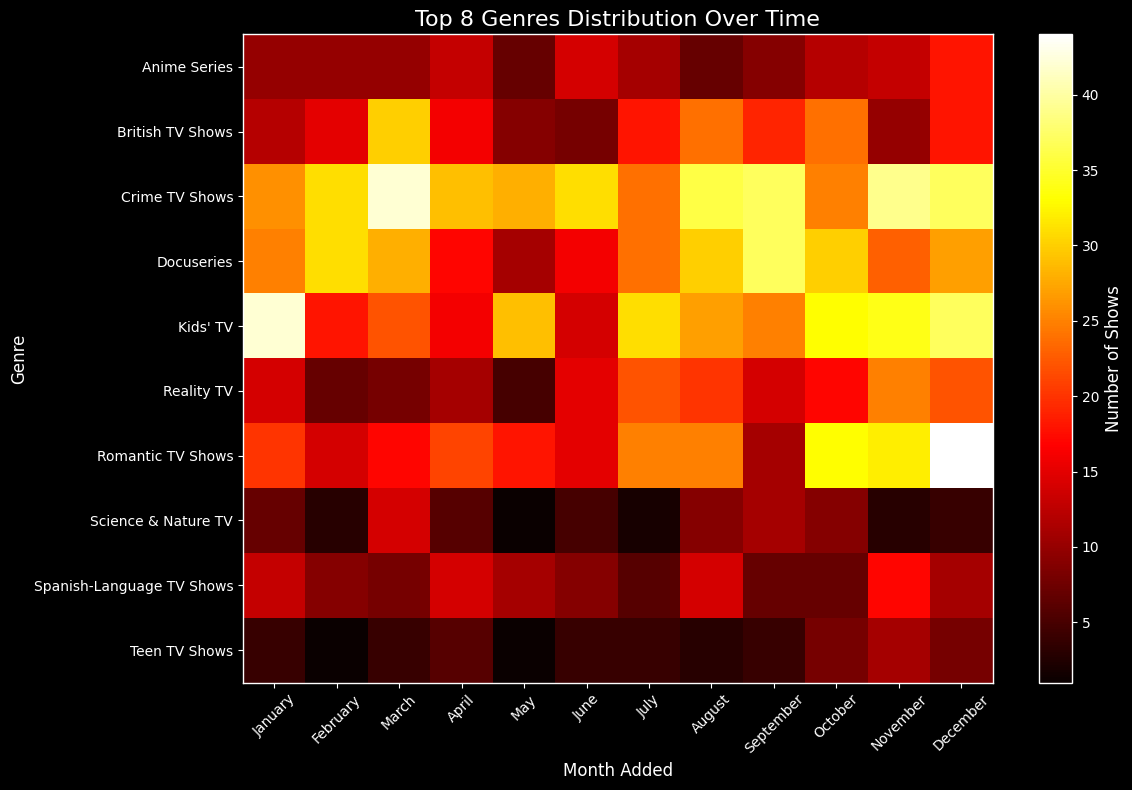

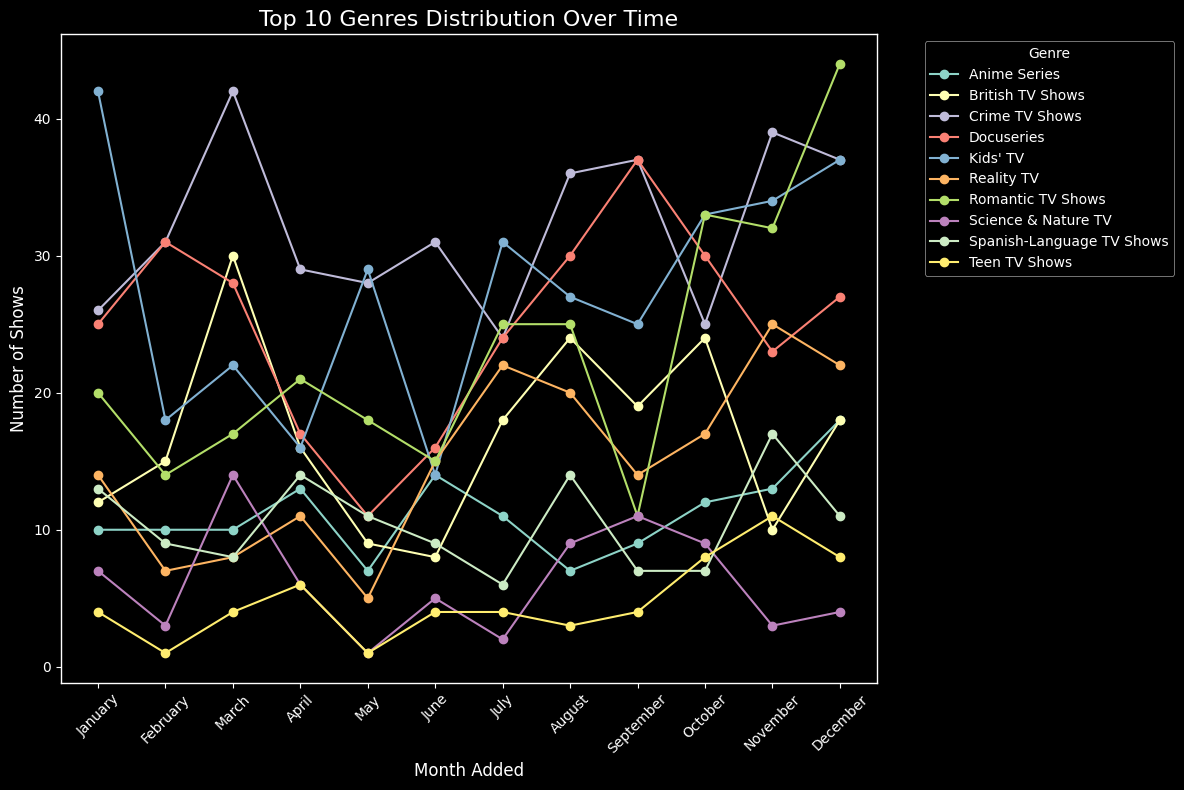

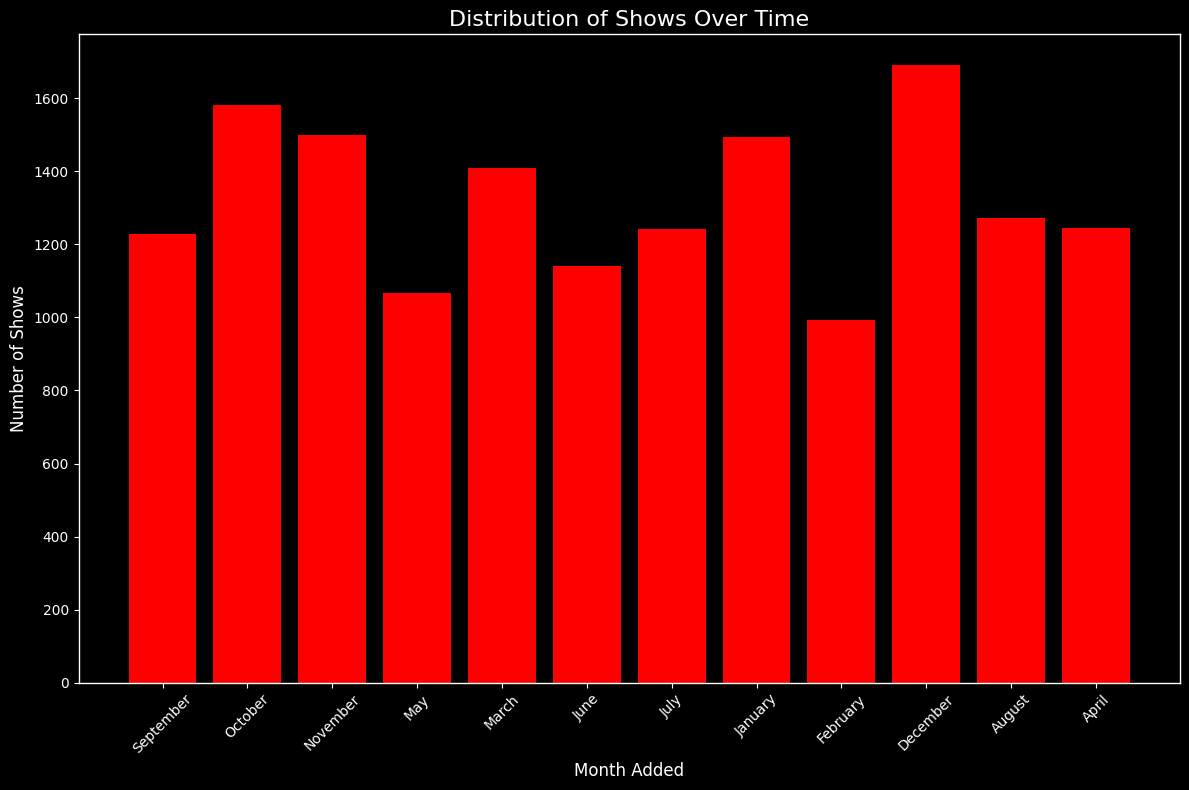

In [353]:
# Build a dataframe that has the title, date_added, release, and exploded listed in data
df_exploded_categories = df[['title', 'date_added', 'release_year', 'listed_in']].copy()
df_exploded_categories['listed_in'] = df_exploded_categories['listed_in'].str.split(', ')
df_exploded_categories['month_added'] = df_exploded_categories['date_added'].str.split(' ').str[0]

df_exploded_categories = df_exploded_categories.explode('listed_in')

# Count the number of times each genre appears each month
df_grouped_categories = df_exploded_categories.groupby(['month_added', 'listed_in']).size().reset_index(name='count')
df_grouped_categories = df_grouped_categories.sort_values('count', ascending=False)

# Make a heatmap of the top 10 genres and their distribution over time, order the months cronologically
df_top_categories = df_grouped_categories['listed_in'].value_counts().head(10).index
df_top_categories = df_grouped_categories[df_grouped_categories['listed_in'].isin(df_top_categories)]

df_top_categories_pivot = df_top_categories.pivot(index='month_added', columns='listed_in', values='count').fillna(0)
df_top_categories_pivot = df_top_categories_pivot.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(12, 8))
plt.imshow(df_top_categories_pivot.T, cmap='hot', aspect='auto')
plt.title('Top 8 Genres Distribution Over Time', fontsize=16)
plt.xlabel('Month Added', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(range(12), df_top_categories_pivot.index, rotation=45)
plt.yticks(range(10), df_top_categories_pivot.columns)
plt.colorbar(label='Number of Shows')
plt.tight_layout()
plt.show()

# Make a dot plot of the top 10 genres and their distribution over time, order the months cronologically
# Set the background color to black
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))
for i, genre in enumerate(df_top_categories_pivot.columns):
    plt.plot(df_top_categories_pivot.index, df_top_categories_pivot[genre], marker='o', label=genre)

plt.title('Top 10 Genres Distribution Over Time', fontsize=16)
plt.xlabel('Month Added', fontsize=12)
plt.ylabel('Number of Shows', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Sum the number of shows per month and plot the distribution, order the months cronologically
df_grouped_month = df_exploded_categories.groupby('month_added').size().reset_index(name='count')
df_grouped_month = df_grouped_month.sort_values('month_added', ascending=False)
# Filter invalid months
df_grouped_month = df_grouped_month[df_grouped_month['month_added'].isin(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])]


plt.figure(figsize=(12, 8))
plt.bar(df_grouped_month['month_added'], df_grouped_month['count'], color='red')
plt.title('Distribution of Shows Over Time', fontsize=16)
plt.xlabel('Month Added', fontsize=12)
plt.ylabel('Number of Shows', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# # Group by the listed_in data and count the number of times each genre appears
# df_grouped_categories = df_exploded_categories.groupby('listed_in').size().reset_index(name='count')
# df_grouped_categories = df_grouped_categories.sort_values('count', ascending=False)
# df_grouped_categories.head(100)


+ ### **Pregunta 7: Directores más populares** 

director
Hakan Algül                8
David Dhawan               9
Steven Spielberg          10
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Cathy Garcia-Molina       13
Jay Karas                 14
Marcus Raboy              15
Raúl Campos, Jan Suter    18
Name: count, dtype: int64


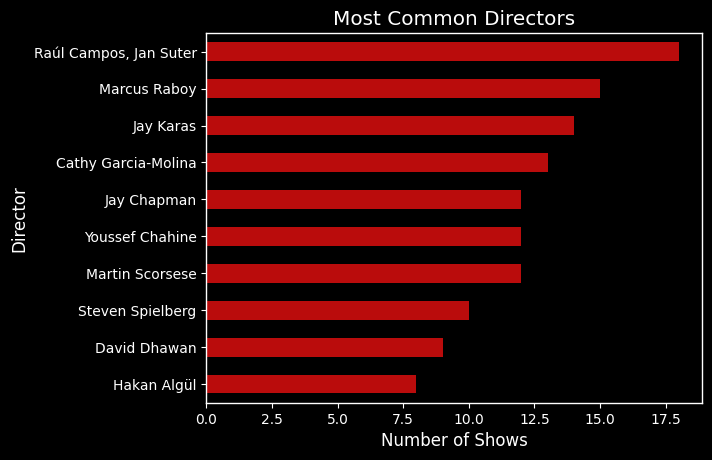

In [354]:
#Plot the most popular directors
director_count = df['director'].value_counts().head(10)
director_count_sorted = director_count.sort_values(ascending=True)
print(director_count_sorted)

# Plot the most common directors in a horizontal bar chart
director_count_sorted.plot(kind='barh', color=colours[2])
plt.title('Most Common Directors')
plt.xlabel('Number of Shows')
plt.ylabel('Director')

plt.show()


# fig, ax = plt.subplots()
# fig.patch.set_facecolor(color=colours[0])
# bar_colours = [colours[2]] * 10
# director_count_sorted.plot(kind='barh', color=bar_colours, ax=ax)

# ax.set_title('Ten most common directors', fontweight = 'bold', color=colours[5])
# ax.set_facecolor(colours[5])

# ax.set_xlabel('N° of movies & shows', color=colours[5])
# ax.set_ylabel('Directors', color = colours[5])

# ax.tick_params(axis='x', colors=colours[0])
# ax.tick_params(axis='y', colors=colours[0])

# for label in ax.get_xticklabels():
#     label.set_color(colours[5])
# for label in ax.get_yticklabels():
#     label.set_color(colours[5])

# plt.show()


In [362]:
# Get titles the shows directed and Jan Suter
jan_suter = df[df['director'].contains 'Jan Suter']['title']
print(jan_suter)


AttributeError: 'Series' object has no attribute 'contains'

+ ### **Pregunta 8: Los actores más populares**

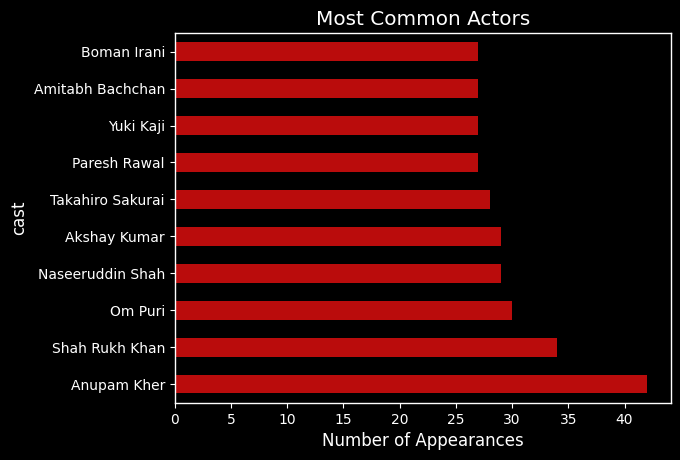

In [364]:
import matplotlib.pyplot as plt

cast_series = df['cast'].str.split(', ').explode()

# Count occurrences of each actor
actor_counts = cast_series.value_counts()

# Plot the 10 most common actors
actor_counts.head(10).plot(kind='barh', color=colours[2])
plt.title('Most Common Actors')
plt.xlabel('Number of Appearances')

plt.show()

+ ### **Pregunta 9: ¿Cómo se distribuye la duración en series y películas?**

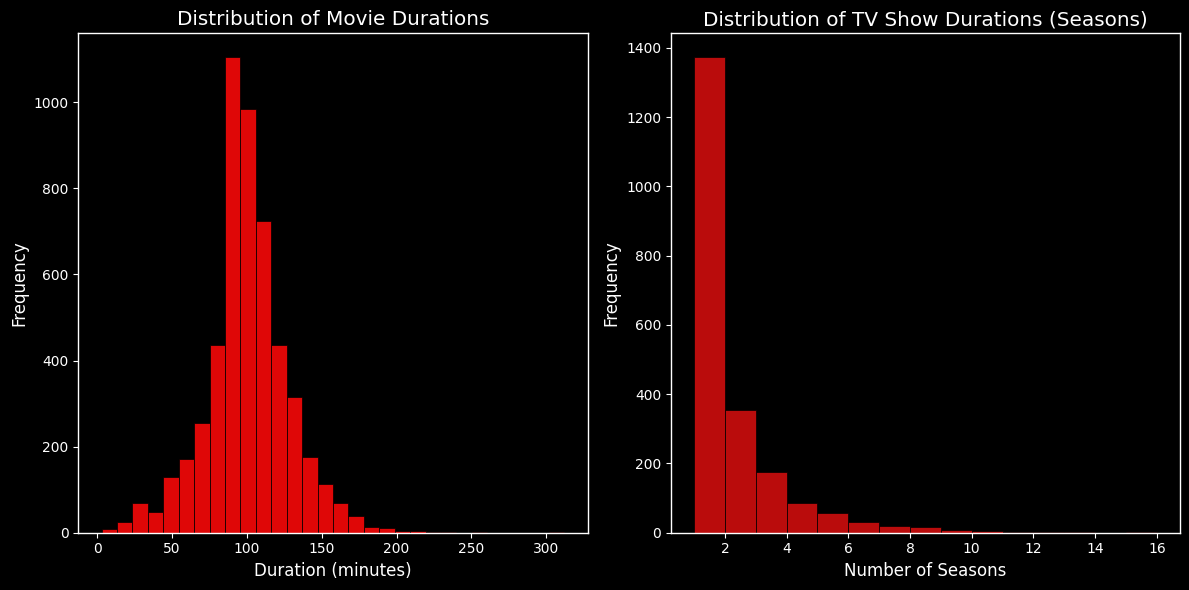

In [369]:
# Separate the data into TV shows and Movies
df_movies = df[df['type'] == 'Movie'].copy()
df_tvshows = df[df['type'] == 'TV Show'].copy()

# Extract the numerical part of the duration for movies (in minutes)
df_movies['duration_minutes'] = df_movies['duration'].str.extract(r'(\d+)').astype(float)

# Extract the numerical part of the duration for TV shows (number of seasons)
df_tvshows['duration_seasons'] = df_tvshows['duration'].str.extract(r'(\d+)').astype(float)

# Define the custom colors
colours = ['#f5f5f1', '#df0707', '#ba0c0c', '#980a0a', '#780909', '#0b0000']

# Remove the background grid and update the plot with new colors
plt.figure(figsize=(12, 6))

# Movies duration distribution
plt.subplot(1, 2, 1)
plt.hist(df_movies['duration_minutes'].dropna(), bins=30, color=colours[1], edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(False)  # Remove the grid

# TV Shows duration distribution
plt.subplot(1, 2, 2)
plt.hist(df_tvshows['duration_seasons'].dropna(), bins=15, color=colours[2], edgecolor='black')
plt.title('Distribution of TV Show Durations (Seasons)')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.grid(False)  # Remove the grid


plt.tight_layout()
plt.show()
